# RANDOM FOREST and LOGISTIC REGRESSION

In [1]:
# This two lines of code make your notebook aware of changes in
# your file without needing to restart the session each time
%load_ext autoreload
%autoreload 2

In [49]:
from random_forest_utils import random_forest
from logistic_regression_utils import logistic_regression
import mirdata
import numpy as np

In [3]:
# data_home = 'data' # here the location you want the data to be in your Drive
# dataset_name = 'gtzan_genre'
# dataset = mirdata.initialize(dataset_name, data_home=data_home)
# # dataset.download()
# print(len(dataset.track_ids))
# dataset.choice_track().audio



# temp

#data_home = '/home/ara/Documents/nyu_fa24_mir/mir_finalProj/data' # here the location you want the data to be in your Drive
data_home = 'gtzan_mini'
dataset_name = 'gtzan_genre'
dataset_version = 'mini'
dataset = mirdata.initialize(dataset_name, data_home=data_home, version=dataset_version)

# Uncomment the following line and run the download code once to download the data
# dataset.download()

# Uncomment the following line and run the validate code to check the data is correct
# dataset.validate()

# Check how many tracks and load a random track
print(len(dataset.track_ids))
dataset.choice_track().audio

100


(array([0.12203979, 0.22442627, 0.19665527, ..., 0.0116272 , 0.03677368,
        0.05535889], dtype=float32),
 22050)

In [4]:
# make obj
rf = random_forest()
lr = logistic_regression()

initializing random forest classifier
initializing logistic regression classifier


In [5]:
print(dataset.choice_track())

Track(
  audio_path="gtzan_mini/gtzan_mini-main/genres/disco/disco.00008.wav",
  beats_path="gtzan_mini/gtzan_tempo_beat-main/beats/gtzan_disco_00008.beats",
  genre="disco",
  tempo_path="gtzan_mini/gtzan_tempo_beat-main/tempo/gtzan_disco_00008.bpm",
  track_id="disco.00008",
  audio: The track's audio

        Returns,
  beats: ,
  tempo: ,
)


In [63]:
# split data
tracks = dataset.load_tracks()
ratio = .3
rf_X_train, rf_X_test, rf_y_train, rf_y_test = rf.split_data(tracks, ratio)
lr_X_train, lr_X_test, lr_y_train, lr_y_test = lr.split_data(tracks, ratio)

['classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical']
['classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical', 'classical']
[]
['country', 'country', 'country', 'country', 'country', 'country', 'country']
['country', 'country', 'country', 'country', 'country', 'country', 'country', 'country', 'country', 'country']
['classical' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical']
['disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco']
['disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco', 'disco']
['classical' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'country' 'country' 'country' 'country' 'country' 'country'
 'country']
['hip-hop', 'hip-hop', 'hip-hop', 'hip-hop', 'hip-hop', 'hip-hop', 'hip-hop']
['hip-hop', 'hip-hop', 'hip-hop', 'hip-hop', 'hip-hop', 'hip-hop', 'hip-hop', 'hip-hop', 'hip-hop', 'hip-ho

In [51]:
# load pre-computed data
import pickle
from sklearn.model_selection import train_test_split
with open('dataset.pkl', 'rb') as f:
    df = pickle.load(f)

X = np.array(df['features'].tolist())
y = np.array(df['label'].tolist())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [7]:
print(tracks['blues.00000'])

Track(
  audio_path="gtzan_mini/gtzan_mini-main/genres/blues/blues.00000.wav",
  beats_path="gtzan_mini/gtzan_tempo_beat-main/beats/gtzan_blues_00000.beats",
  genre="blues",
  tempo_path="gtzan_mini/gtzan_tempo_beat-main/tempo/gtzan_blues_00000.bpm",
  track_id="blues.00000",
  audio: The track's audio

        Returns,
  beats: ,
  tempo: ,
)


In [74]:
# get classifier
rf_model = rf.gen()
lr_model = lr.gen()

In [76]:
# fit
import numpy as np
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

/home/ara/Documents/nyu_fa24_mir/mir_finalProj/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
# predict
rf_y_pred = rf.pred(X_test)
lr_y_pred = lr.pred(X_test)

In [78]:
# eval
rf_accuracy_score, rf_classification_report = rf.eval(y_test, rf_y_pred)
lr_accuracy_score, lr_classification_report = lr.eval(y_test, lr_y_pred)

In [79]:
print(rf_accuracy_score)
print(lr_accuracy_score)

0.6633333333333333
0.5533333333333333


In [80]:
print(rf_classification_report)
print(lr_classification_report)

              precision    recall  f1-score   support

       blues       0.69      0.69      0.69        32
   classical       0.97      0.94      0.96        34
     country       0.56      0.66      0.61        35
       disco       0.62      0.42      0.50        36
      hiphop       0.47      0.71      0.57        21
        jazz       0.48      0.76      0.59        21
       metal       0.92      1.00      0.96        22
         pop       0.69      0.76      0.72        33
      reggae       0.71      0.56      0.62        36
        rock       0.53      0.30      0.38        30

    accuracy                           0.66       300
   macro avg       0.67      0.68      0.66       300
weighted avg       0.67      0.66      0.66       300

              precision    recall  f1-score   support

       blues       0.45      0.72      0.55        32
   classical       0.89      0.94      0.91        34
     country       0.67      0.34      0.45        35
       disco       0.56 

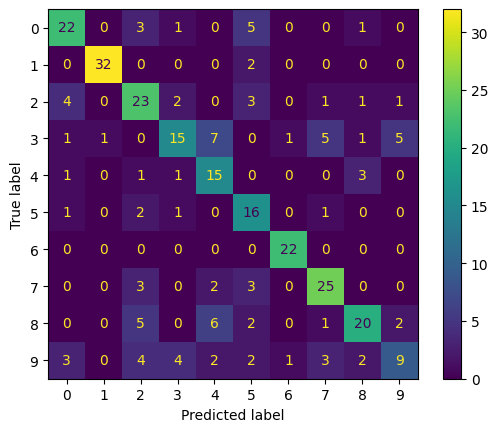

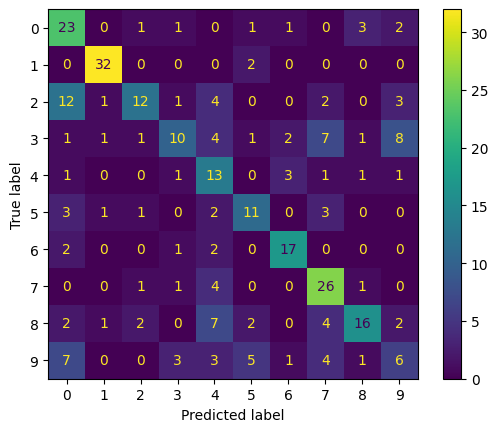

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 


rf_cm = confusion_matrix(y_test, rf_y_pred)
lr_cm = confusion_matrix(y_test, lr_y_pred)

rf_cmd = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
rf_cmd.plot()
plt.show()

lr_cmd = ConfusionMatrixDisplay(confusion_matrix=lr_cm)
lr_cmd.plot()
plt.show()